# Exemplos de questões paramétricas no MCTest, com correção automática no Moodle+VPL

O MCTest possui apenas duas sintaxes reservadas para as questões paramétricas: **[[def:codigo\_python]]** e **[[𝑐𝑜𝑑𝑒:variavel]]**

- **codigo\_python** deve ser instruções em python para definir **variavel** e gerar os casos de teste, se for uma questão para correção automática no Moodle+VPL.

- **variavel** pode ser também uma instrução em python, como **int(variavel)+1**, se a variável for uma string de um número e foi definida no passo anterior.

Assim, toda questão paramétrica no MCTest deve ser dividida em duas partes:

  - **Parte 1:** uma descrição em $\LaTeX$, pondendo incluir vários **[[code:...]]**
  - **Parte 2:** instruções em python dentro de um único **[[def:...]]** para definir os parâmetros dentro de **[[code:...]]** e os casos de teste.

Nos próximos exemplos, primeiro apresentamos a descrição da questão em formato $\LaTeX$ (**Parte 1**), depois as instruções em python, dentro de **[[def:...]]** (**Parte 2**).

Observe que para criar outras questões basta mudar as descrições (**Parte 1**) e as linhas entre **#>>>>** e **#<<<<** (na **Parte 2**).

# Exemplo 1: Juros

Escreva um programa que auxilia uma loja na hora de fazer uma venda. Seu programa deve: Perguntar o preço do produto; Considerar que a loja parcela este preço em somente $[[code:parcelas]]$ parcelas (sem juros); e mostrar quanto será o valor de uma parcela (arredondando para duas casas decimais apenas). Veja exemplo a seguir:

Exemplo de Entrada:
\begin{verbatim}
[[code:caso0_inp]]
\end{verbatim}

Exemplo de Saída:
\begin{verbatim}
[[code:caso0_out]]
\end{verbatim}

% necessário para gerar casos de testes no moodle
\begin{comment}
[[code:moodle_cases]]
\end{comment}

In [ ]:
#[[def:  # descomente esta linha para rodar no mctest

import json
import numpy as np

# PARÂMETROS UTILIZADOS NA DESCRIÇÃO DA QUESTÃO 
#>>>> INÍCIO 
# usar random para ter uma questão diferente para cada aluno
parcelas =  np.random.randint(11,24)
#<<<< FINAL 

inp_list, out_list, casos_teste = [], [], 4 # n. de casos de teste - MUDAR
for i in range(casos_teste):

  #>>>> INÍCIO DA SOLUÇÃO DA QUESTÃO 
  # nesse exemplo, valor tem que ser lindo como input para rodar no Moodle
  valor = np.random.randint(50000,81000)/100  # usar random para ter casos de teste diferentes
  inp = str(valor)+'\n'
  out = '%.2f' % (valor/parcelas)
  #<<<< FINAL DA SOLUÇÃO DA QUESTÃO 

  # listas de casos de teste
  inp_list.append(inp)
  out_list.append(out)

cases = {}
cases['input']  = np.array(inp_list).tolist()
cases['output'] = np.array(out_list).tolist()
moodle_cases = json.dumps(cases)

# para mostrar um exemplo na descrição da questão
caso0_inp = cases['input'][0]
caso0_out = cases['output'][0]

#]] % FINAL DO **[[def:**, descomente esta linha para rodar no mctest

# para verificar se está funcionando corremente neste notebook
print("Exemplo de Entrada(s) com input:\n" + caso0_inp)
print("Exemplo de Saída(s):\n" + caso0_out)
print("\nEssa lista será enviada para o email, arquivo 'linker.json', após gerar o exame no mctest:\n" + moodle_cases)

Exemplo de Entrada(s) com input:
540.53

Exemplo de Saída(s):
28.45

Essa lista será enviada para o email, arquivo 'linker.json', após gerar o exame no mctest:
{"input": ["540.53\n", "801.18\n", "611.34\n", "738.79\n"], "output": ["28.45", "42.17", "32.18", "38.88"]}


# Exemplo 2: Jogo de moedas

Considere uma moeda (não viciada) de \textbf{cara} (representada neste jogo pelo número $[[code:numero]]$) e \textbf{coroa} (número $[[code:numero+1]]$). Dois jogadores querem apostar em $[[code:jogadas]]$ jogadas, quem consegue o maior número de caras.

\vspace{2mm}\noindent\textbf{Exemplo de entrada lida com o comando \texttt{input}:}
\begin{verbatim}
[[code:caso0_inp]]
\end{verbatim}

\vspace{-1mm}\noindent {\bf Atenção:} 
O seu programa deve ler um valor inteiro representando uma \textbf{"semente"}, que deverá ser utilizado no comando \textbf{random.seed(semente)}, a ser incluído no seu programa logo após a leitura de dados com comando \texttt{input}.

\vspace{3mm}\noindent
Simule o jogo e imprima no final quantas vezes deu cara para cada jogador e quem ganhou o jogo.

\\\vspace{3mm}\noindent\textbf{Formatar a sua resposta exatamente como no seguinte exemplo:}
\\\vspace{-5mm}
\begin{verbatim}
[[code:caso0_out]]
\end{verbatim}

\medskip

% necessário para gerar casos de testes no moodle
\begin{comment}
[[code:moodle_cases]]
\end{comment}

In [ ]:


#[[def:  # descomente essa linha para rodar no mctest

import json
import random as rd
import numpy as np

# PARÂMETROS UTILIZADOS NA DESCRIÇÃO DA QUESTÃO 
#>>>> INÍCIO 
# usar random para ter uma questão diferente para cada aluno
numero = rd.randint(0, 9)
jogadas = rd.randint(5, 20)
#<<<< FINAL 

#>>>> INÍCIO pode criar tb funções para calcular as respostas
def algorithm(numero):
  # Se não passar por parâmetro, tem que definir como global. 
  # Além disso, tem que dar import dentro da função.
  global jogadas
  import random as rd
  cara1, cara2 = 0, 0
  for i in range(jogadas):
    sorteio = rd.randint(numero, numero+1)
    if sorteio == numero:
      cara1 += 1
    sorteio = rd.randint(numero, numero+1)
    if sorteio == numero:
      cara2 += 1
  out  = "Número de jogadas: %d\n" % (jogadas)
  out += "Jogador 1: %d caras\n" % (cara1)
  out += "Jogador 2: %d caras\n" % (cara2)
  if cara1 > cara2:
    out += "Jogador 1 ganhou!"
  elif cara1 < cara2:
    out += "Jogador 2 ganhou!"
  else:
    out += "Jogador 2 ganhou!"
  return out
#>>>> FINAL das funções

inp_list, out_list, casos_teste = [], [], 7 # n. de casos de teste - MUDAR
for semente in range(0, casos_teste):

  #>>>> INÍCIO DA SOLUÇÃO DA QUESTÃO 
  # nesse exemplo, semente tem que ser lindo com input para rodar no Moodle
  # pode ter vários inputs. Cada aluno terá uma sequência distinta de casos
  inp = str(semente) + "\n"
  rd.seed(semente+numero+jogadas) 
  out = algorithm(numero) # pode usar funções para calcular os casos
  #<<<< FINAL DA SOLUÇÃO DA QUESTÃO 

  inp_list.append(inp)
  out_list.append(out)

cases = {}
cases['input'] = np.array(inp_list).tolist()
cases['output'] = np.array(out_list).tolist()
moodle_cases = json.dumps(cases)

caso0_inp = cases['input'][0]
caso0_out = cases['output'][0]
rd.seed() # semente default IMPORTANTE INCLUIR ESSA LINHA QUANDO USAR SEED

#]] % FINAL DO **[[def:**, descomente esta linha para rodar no mctest

# para verificar se está funcionando corremente neste notebook
print("Exemplo de Entrada(s) com input:\n" + caso0_inp)
print("Exemplo de Saída(s):\n" + caso0_out)
print("\nEssa lista será enviada para o email, arquivo 'linker.json', após gerar o exame no mctest:\n" + moodle_cases)

Copiei e colei essa questão no MCTest (acesso aos professores de BCC) nesse [link](http://mctest.ufabc.edu.br/topic/question/1627/update)

Após clicar em Criar-PDF, será gerado um PDF para verificação:

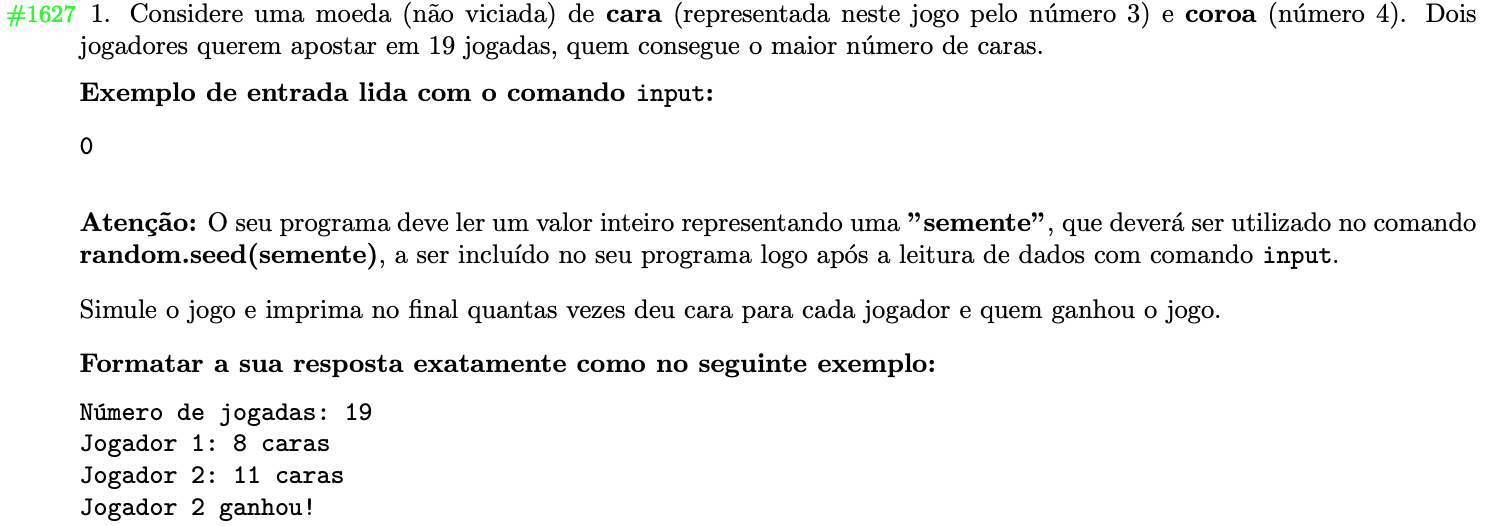

# Uso do comando SEED

Rode várias vezes o código a seguir. Percebeu a diferença do uso da **"semente"**  (**seed**)? Quais partidas têm os jogadores justos (sem usar dados viciados)?

In [ ]:
import random as rd
print("jogador1\tjogador2")
print("  PARTIDA ***1***")
for i in range(10):
  rd.seed(i) # semente varia entre 0 e 9
  print(rd.randint(1, 6),'\t\t', rd.randint(1, 6))

print("  PARTIDA ***2***")
for i in range(10):
  rd.seed(5) # semente fixa igual 5
  print(rd.randint(1, 6),'\t\t', rd.randint(1, 6))

print("  PARTIDA ***3***")
for i in range(10):
  rd.seed() # semente default, geralmente a hora do sistema
  print(rd.randint(1, 6),'\t\t', rd.randint(1, 6))

# Exemplo 3: arquivos fake e gráficos

Considere a tabela deste link: \url{[[code:path1]]} 

\noindent 
Faça um programa contendo instruções para ler do teclado as Notas limites para conversão em conceitos, conforme exemplo abaixo.
A se $10\geq media \geq notaA$; 
B se $notaA > media \geq notaB$;
C se $notaB > media \geq notaC$;
D se $notaC > media \geq notaD$;
F se $notaD > media$.
\
O seu programa deve conter instruções para calcular a média penderado, considerando os pesos \textbf{'Prova 1'}$=[[code:pesoP1]]$, \textbf{'Prova 2'}$=[[code:pesoP2]]$ e \textbf{'Trabalho'}$=[[code:pesoTr]]$. 
\
O seu programa deverá criar mais uma coluna na tabela chamada \textbf{'Nota'}, contendo a média ponderada das colunas, com esses pesos.
\
Além disso, o seu programa deverá criar também a coluna \textbf{'Conceito'}, conforme regra anterior. A saída do seu programa deverá imprimir a frequência de cada conceito (ver instruções nas sugestões no final desta questão).

\vspace{1mm}
\noindent\textbf{Entrada lida com o comando \texttt{input}:}
\begin{verbatim}
[[code:cases['input'][0]]]
\end{verbatim}

\\\vspace{-4mm}
\noindent\textbf{Saída com os valores solicitados, conforme entradas lidas:}
\\\vspace{-5mm}
\begin{verbatim}
[[code:caso0_out]]
\end{verbatim}

\\\vspace{1mm}
\noindent 
{\bf Sugestão 1:} Formatar a responta com a seguinte função:
{\small
\begin{verbatim}
def formataConceito(df):
    hist = df['Conceito'].value_counts()
    resp = ''
    if 'A' in hist.keys(): # verifica se tem algum conceito A
        resp += 'A: %d\n' % hist['A']
    if 'B' in hist.keys():
        resp += 'B: %d\n' % hist['B']
    if 'C' in hist.keys():
        resp += 'C: %d\n' % hist['C']
    if 'D' in hist.keys():
        resp += 'D: %d\n' % hist['D']
    if 'F' in hist.keys():
        resp += 'F: %d\n' % hist['F']
    return str(resp)
\end{verbatim}
}

\\\vspace{3mm}
\noindent 
{\bf Sugestão 2:} Para adicionar a coluna \texttt{'Notas'} na tabela \texttt{df}, contendo a média aritimética das demais notas, criar a função \texttt{calculaNota} e a instrução a seguir:

% função para calcular a média em cada linha da tabela
% criar a coluna 'Notas' e utilizar o método apply, com argumentos: 
% a função criada e axis=1 (para processar cada linha de df) 
{\small
\begin{verbatim}
def calculaNota(linha, pesoP1, pesoP2, pesoTr):
    return (linha["Prova 1"]*pesoP1 + linha["Prova 2"]*pesoP2 + linha["Trabalho"]pesoTr) / (pesoP1+pesoP2+pesoTr)

df['Nota'] = df.apply(calculaNota, axis=1)
\end{verbatim}
}

\vspace{3mm}
\noindent 
{\bf Desafio:} Crie o gráfico a seguir, mas não imprimir na sua solução enviada na atividade do Moodle: \\
{\small \url{[[code:pathGraficoURL]]}}

\\\vspace{3mm}
\noindent 
{\bf Atenção:} Na sua solução considere que o arquivo está armazenado localmente. Assim, para abri-lo utilize o nome \texttt{"[[code:path1short]]"},  ao invés de utilizar o link anterior.

% necessário para gerar casos de testes no moodle ==> mude verbatim <==> comment após finalizar a questao
\begin{comment}
[[code:moodle_cases]]
\end{comment}

In [ ]:

#[[def:  # descomente essa linha para rodar no mctest

import json
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# PARÂMETROS UTILIZADOS NA DESCRIÇÃO DA QUESTÃO 
#>>>> INÍCIO 
# usar random para ter uma questão diferente para cada aluno
pesoP1 = np.random.randint(2, 5)
pesoP2 = np.random.randint(pesoP1, 7)
pesoTr = np.random.randint(1, 4)
#<<<< FINAL 

#>>>> INÍCIO pode criar tb funções para calcular as respostas
def calculaConceito(row, pesoA, pesoB, pesoC, pesoD):
    if row['Nota'] >= pesoA:
        conceito = "A"
    elif row['Nota'] >= pesoB:
        conceito = "B"
    elif row['Nota'] >= pesoC:
        conceito = "C"
    elif row['Nota'] >= pesoD:
        conceito = "D"
    else:
        conceito = "F"
    return conceito

def calculaNota(linha, P1, P2, Tr):
    return (linha["Prova 1"]*P1 + linha["Prova 2"]*P2 + linha["Trabalho"]*Tr) / (P1+P2+Tr)

def formataConceito(df):
    hist = df['Conceito'].value_counts()
    resp = ''
    if 'A' in hist.keys():
        resp += 'A: %d\n' % hist['A']
    if 'B' in hist.keys():
        resp += 'B: %d\n' % hist['B']
    if 'C' in hist.keys():
        resp += 'C: %d\n' % hist['C']
    if 'D' in hist.keys():
        resp += 'D: %d\n' % hist['D']
    if 'F' in hist.keys():
        resp += 'F: %d\n' % hist['F']
    return str(resp)
#>>>> FINAL das funções

# sortear um arquivo csv
def sortearArquivo():
    import pandas as pd
    urls = pd.read_csv('https://www.dropbox.com/s/6elponkrlcu9s3u/URLS.csv?dl=1')
    (linhas, _) = urls.shape
    path1 = urls.values[np.random.randint(linhas)][0].replace('?dl=0', '?dl=1')
    path1short = path1.split('/')[-1].split('?dl=1')[0]
    df1 = pd.read_csv(path1)
    return [path1, path1short, df1]

path1, path1short, df = sortearArquivo()

inp_list, out_list, casos_teste = [], [], 2 # n. de casos de teste - MUDAR
for i in range(casos_teste): 

  #>>>> INÍCIO DA SOLUÇÃO DA QUESTÃO 
  # nesse exemplo, pesos têm que ser lindos com inputs para rodar no Moodle.
  # Cada aluno terá uma sequência distinta de casos de teste
  pesoA = round(np.random.randint(78, 91) / 10, 2)
  pesoB = round(np.random.randint(68, 72) / 10, 2)
  pesoC = round(np.random.randint(58, 62) / 10, 2)
  pesoD = round(np.random.randint(38, 52) / 10, 2)
  df['Nota'] = df.apply(calculaNota, axis=1,  args=[pesoP1, pesoP2, pesoTr])
  df['Conceito'] = df.apply(calculaConceito, axis=1, args=[pesoA, pesoB, pesoC, pesoD])
  inp = str(pesoA) + '\n' + str(pesoB) + '\n' + str(pesoC) + '\n' + str(pesoD) + '\n' 
  out = formataConceito(df)
  #<<<< FINAL DA SOLUÇÃO DA QUESTÃO 

  inp_list.append(inp)
  out_list.append(out)

cases = {}
cases['input'] = np.array(inp_list).tolist()
cases['output'] = np.array(out_list).tolist()
moodle_cases = json.dumps(cases)

# pega o primeiro caso de teste para exemplos e gráficos
caso0_inp = cases['input'][0]
caso0_out = cases['output'][0]

pesoA,pesoB,pesoC,pesoD,_= caso0_inp.split('\n')
vpesos = [float(pesoA),float(pesoB),float(pesoC),float(pesoD)]
df['Nota'] = df.apply(calculaNota, axis=1, args=[pesoP1, pesoP2, pesoTr])
df['Conceito'] = df.apply(calculaConceito, axis=1, args=vpesos)

# plotar gráficos
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)

df1 = df[["Prova 1","Prova 2","Trabalho","Nota"]]
plt.title("Gráfico boxplot (seta verde é a média)")
ax1.set_xlabel("Avaliações e Nota Final", fontsize=8)
ax1.set_ylabel("Nota", fontsize=8)
ax1.set_ylim([-1,10])
ax1 = df1.boxplot(showmeans=True)

ax2 = fig.add_subplot(122)
plt.title("Gráfico do Histograma dos Conceitos")
ax2.set_xlabel("Conceitos", fontsize=8)
ax2.set_ylabel("Frequência", fontsize=8)
A = np.sum(df['Conceito'] == "A")
B = np.sum(df['Conceito'] == "B")
C = np.sum(df['Conceito'] == "C")
D = np.sum(df['Conceito'] == "D")
F = np.sum(df['Conceito'] == "F")
nobs = [A,B,C,D,F]
conceitos=['A','B','C','D','F']
s = pd.Series(nobs, index=conceitos)
s.plot(kind='bar', rot=0, color=['b', 'g', 'r', 'DarkOrange', 'DarkRed'])
pos = range(len(nobs))
ax2.set_ylim([-1,np.max(nobs)+2])
for tick,label in zip(pos,ax2.get_xticklabels()):
  ax2.text(tick, nobs[tick] + 0.13, nobs[tick], horizontalalignment='center', size='12', color='b', weight='semibold')

# url do gráfico
vars0 = ';'.join([i for i in caso0_inp.split('\n')[:-1]])
pathGrafico = './tmp/imgs180days/figBCC-if05(' + path1short[:-4] + ')(' + vars0 + ').png'
pathGraficoURL = 'http://mctest.ufabc.edu.br:8080' + pathGrafico[1:]
try: # no mctest, salva em ./tmp/imgs180days/
  plt.savefig(pathGrafico)
except:
  plt.show()
plt.close()

#]] % FINAL DO **[[def:**, descomente esta linha para rodar no mctest

# para verificar se está funcionando corremente neste notebook
print("Exemplo de Entrada(s) com input:\n" + caso0_inp)
print("Exemplo de Saída(s):\n" + caso0_out)
print("Essa lista será enviada para o email, arquivo 'linker.json', após gerar o exame no mctest:\n" + moodle_cases)

# Para gerar arquivos fake

In [ ]:
#!pip install names

import pandas as pd
import random
import statistics
from names import get_full_name
from google.colab import files

def validarVetor(ini, fim, n):  # criar vetor que existe moda
  while True:
    try:
      v = [round(random.betavariate(ini, fim) * 100)/10 for i in range(n)]
      m = statistics.mode(v) # para existir moda
      return v
    except:
      pass

def gen_data(n=30):
  data = {}
  data['Nome'] = [get_full_name() for i in range(n)]
  data['Prova 1'] = validarVetor(2, 8, n)
  data['Prova 2'] = validarVetor(5, 5, n)
  data['Trabalho'] = validarVetor(8, 2, n)
  data = pd.DataFrame(data)
  data.set_index('Nome', inplace=True)
  return (data)

def gen_csv(size=10):
  for x in range(size):
    data = gen_data()
    file = 'fake_classrooms' + str(x + 1).zfill(2) + '.csv'
    data.to_csv(file)
    files.download(file) 
    # salvar no dropbox, pois o drive limita o n. de acessos
    # alterar urls dentro de URLS.csv
    # se quiser mudar os arquivos csv, fazer upload direto na pasta do site.
    # não precisar mudar o arquivo URLS.csv

gen_csv(12)